## **CASO DE APLIACIÓN AGRUPAMIENTO: AEROLÍNEA (MERCADEO)**

Una aerolínea tiene la necesidad de identificar la estrategia de atención de sus clientes,
identificando la posibilidad de **generar esquemas diferenciados de acción** dependiendo de las
determinaciones y capacidades de los clientes. Es por esto que el equipo de mercadeo decidió
realizar una encuesta tratando de levantar de manera demográfica el comportamiento de los
clientes.

## Metodología ASUM-DM

1. **Entendimiento del Negocio:** Es una aerolínea que busca entender a sus clientes en particular, el objetivo de negocio es *entender las diferencias o particularidades entre clientes* para ofrecer modelos diferencias de actuación. (Todos los clientes se sientan únicos)

2. **Enfoque Analítico:** Diseñar un experimento que permita *agrupar* en una cantidad específica de grupos a los clientes de la aerolínea para definir la cantidad de acciones diferenciadas posibles.

3. **Requerimiento de Datos:** Se requieren *datos demográficos, datos del servicio prestado al usuario, datos propios del negocio.*

4. **Recolección de Datos:**

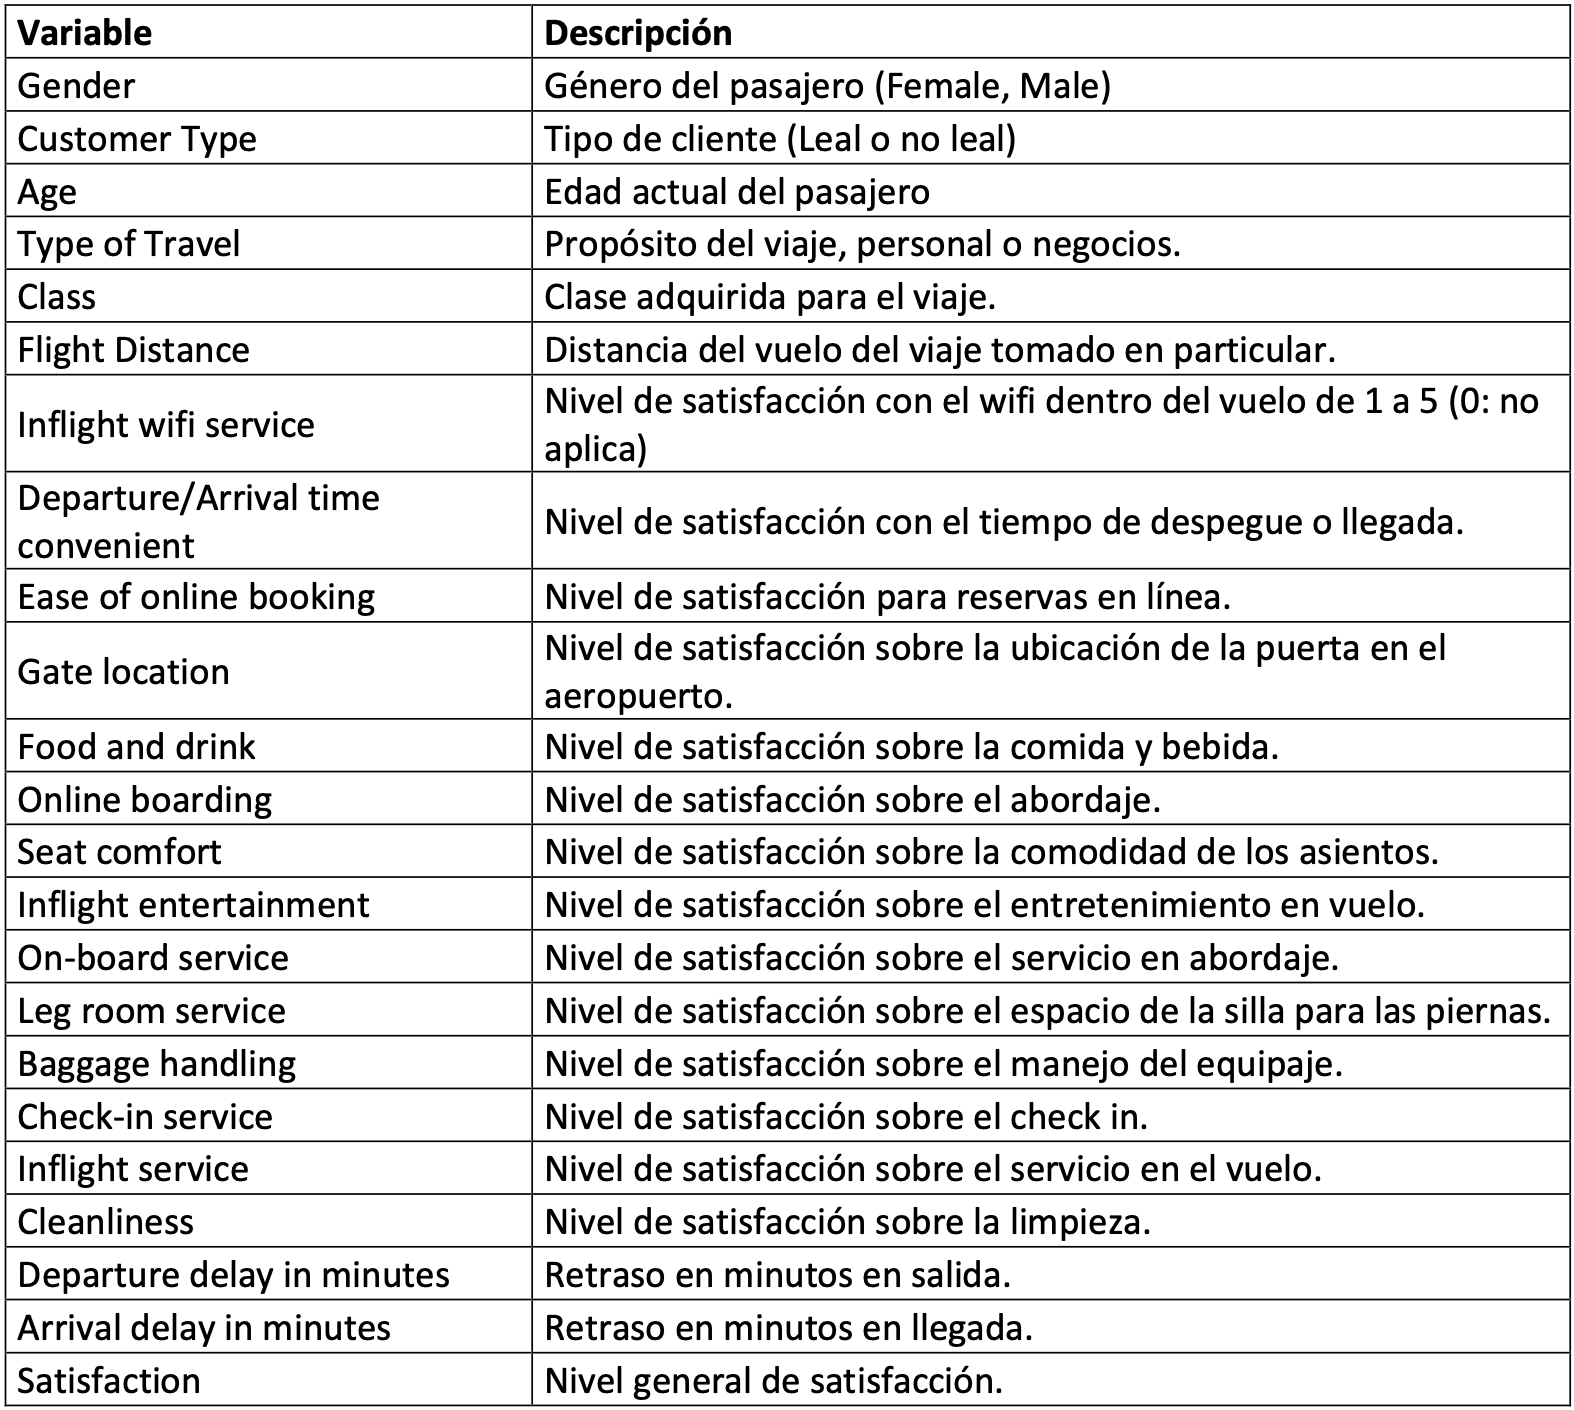

5. **Entendimiento de Datos:**

- Identificar la existencia de datos nulos
- Exploración univariada de los datos
- Exploración multivariada de los datos
- Identificación de correlación y multicolinealidad

In [3]:
# Tratamiento estructurado de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Advertencias
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Datos/airline_loyalty.csv')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
data.select_dtypes(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

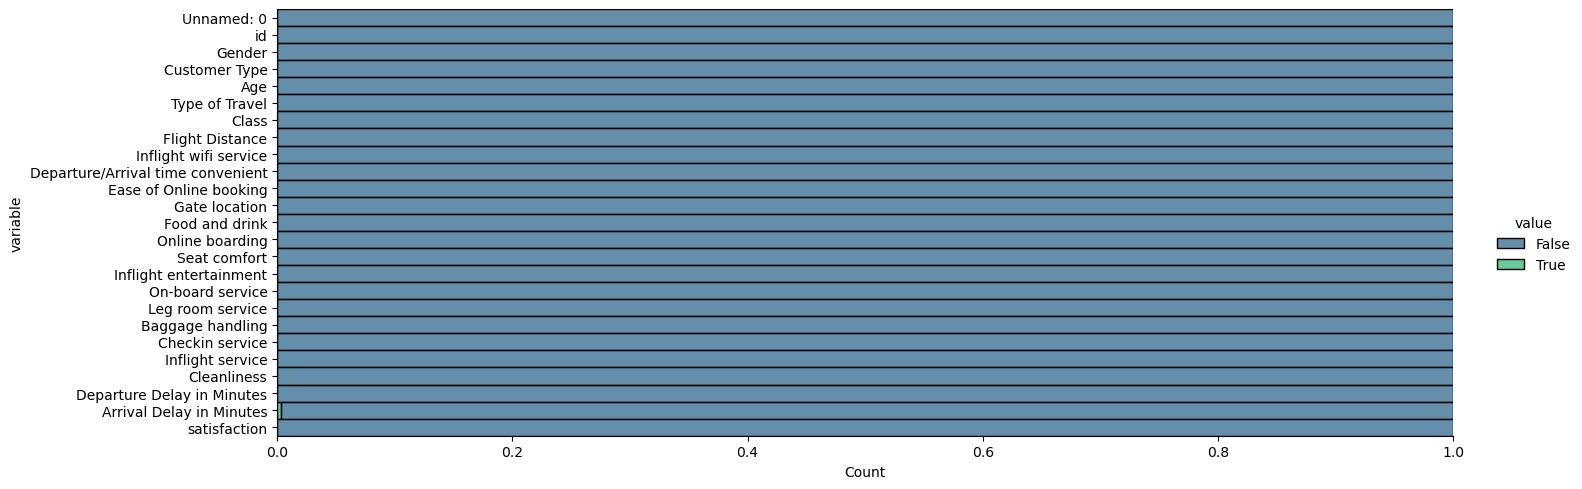

In [7]:
# Visualización de la existencia de datos nulos por variable
data.isnull().melt().pipe(lambda df: sns.displot(data=df, y = 'variable', palette='viridis', hue='value', multiple='fill', aspect=3))
plt.show()

In [8]:
total = len(data)
nulos = data.isnull().sum()
resumen_nulos = pd.DataFrame({'Nulos': nulos, 'Total': total})
print(resumen_nulos)

                                   Nulos   Total
Unnamed: 0                             0  103904
id                                     0  103904
Gender                                 0  103904
Customer Type                          0  103904
Age                                    0  103904
Type of Travel                         0  103904
Class                                  0  103904
Flight Distance                        0  103904
Inflight wifi service                  0  103904
Departure/Arrival time convenient      0  103904
Ease of Online booking                 0  103904
Gate location                          0  103904
Food and drink                         0  103904
Online boarding                        0  103904
Seat comfort                           0  103904
Inflight entertainment                 0  103904
On-board service                       0  103904
Leg room service                       0  103904
Baggage handling                       0  103904
Checkin service     

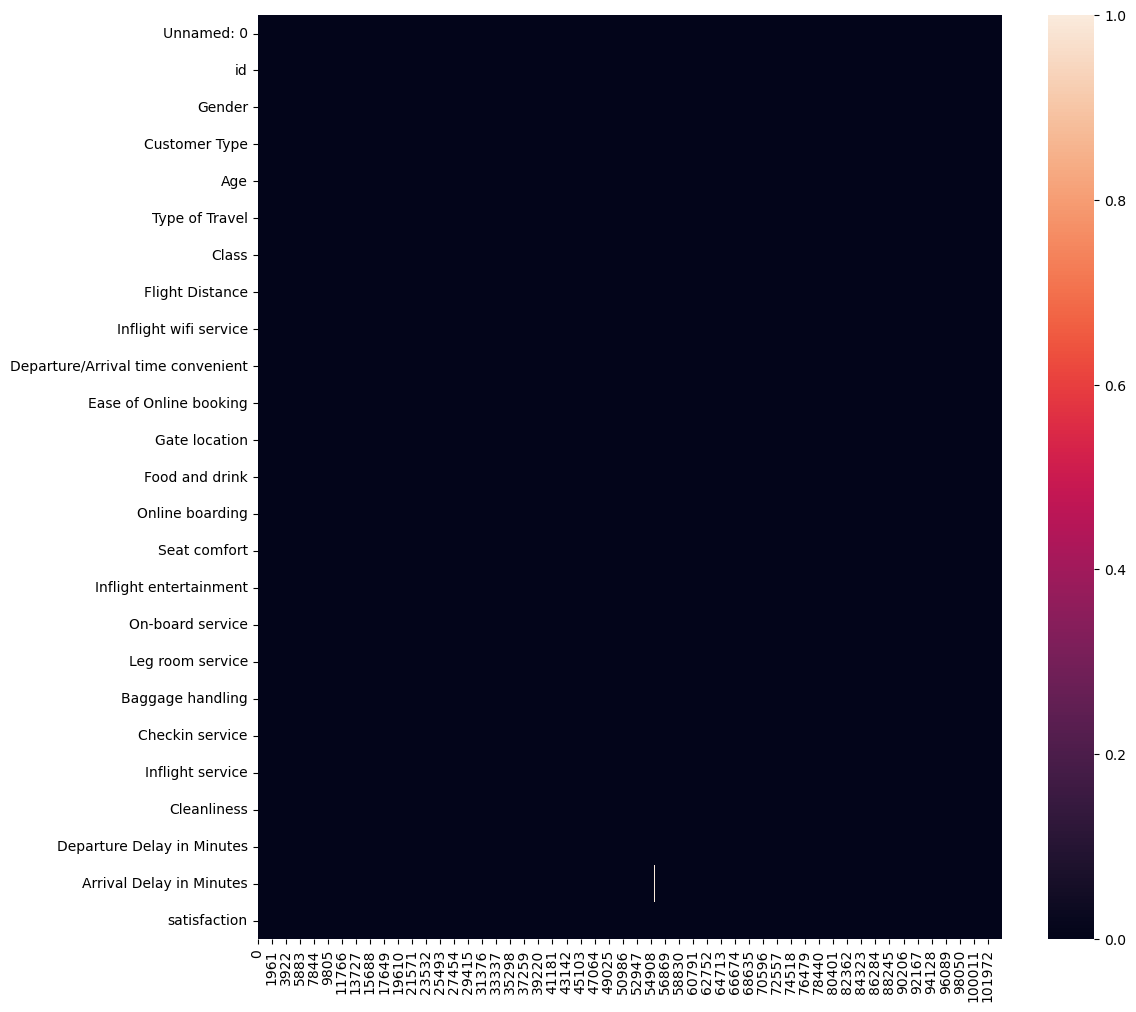

In [9]:
plt.figure(figsize=(12,12))
data.isnull().transpose().pipe(lambda df: sns.heatmap(data = df))
plt.show()

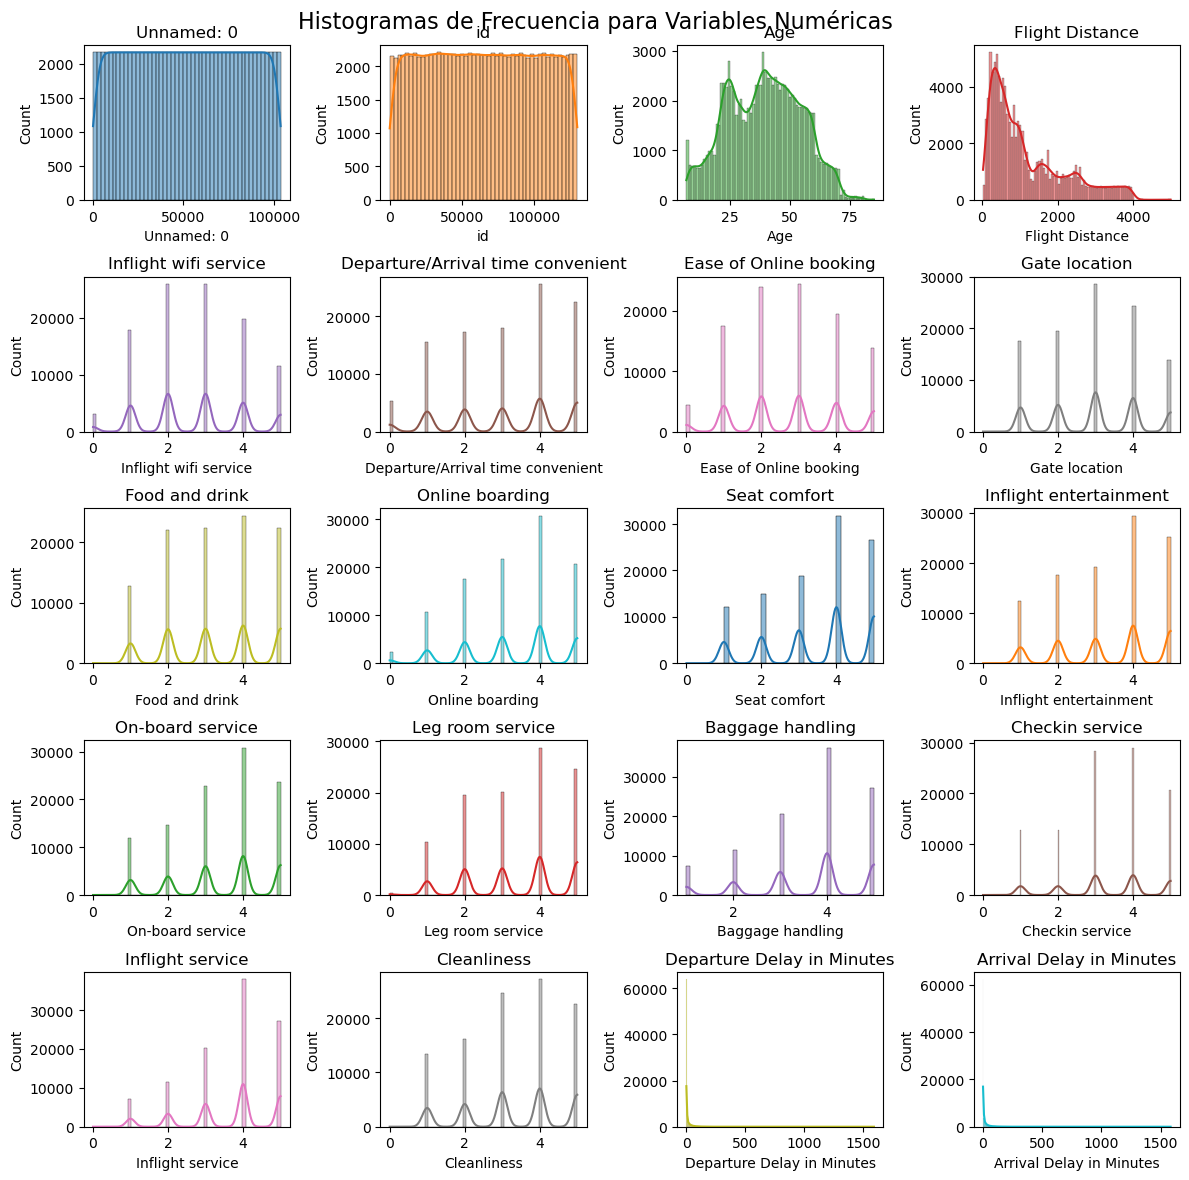

In [10]:
# Exploración Univariada de los datos
## Para datos numéricos: histogramas de frecuencia
## Para datos categóricos: gráficos de torta

## HISTOGRAMAS DE FRECUENCIA
fig, ax = plt.subplots(5, 4, figsize=(12, 12))
ax = ax.flat
num_col = data.select_dtypes(include=['int64', 'float64']).columns # SOLO VAMOS A GRAFICAR VARIABLES NUMÉRICAS
for i, col in enumerate(num_col):
    sns.histplot(
        data = data,
        x = col,
        kde = True,
        color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'],
        ax = ax[i]
    )
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Histogramas de Frecuencia para Variables Numéricas', fontsize=16)
plt.show()

Toma notas
 podriamos eliminar unified
 id no nos dice nada pero es necesaria
 flight distance mas corta normal 
 las variables de los servicios son de 0-5 pq son catef=gricas 
 Dept in min no se ve un patron definido y hay un patron muy pronunciada en 0 min y por el comportamiento de la variable causa un rango muy amplio en y


<function matplotlib.pyplot.show(close=None, block=None)>

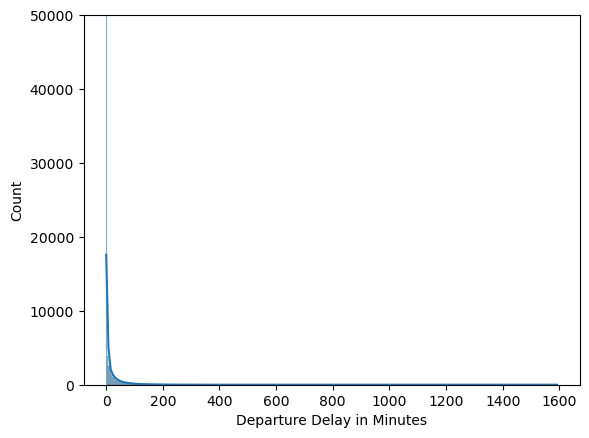

In [11]:
sns.histplot(data=data, x = data['Departure Delay in Minutes'], kde =True)
plt.ylim(0,50000)
plt.show

## Comportamiento de la variable ##
Cuando se compara la grafica y relacionamos el comportamiento de la variable con el de una distribución revisamos si hay valores negativos, estos si serían atipicos, y todos los elementos menores a cero se convierten en 0 osea nulos 

En el contexto de negocio de esta variable no es raro que tengamos tantos valores en 0, no nos podemos basar solo en la estadistica 

<function matplotlib.pyplot.show(close=None, block=None)>

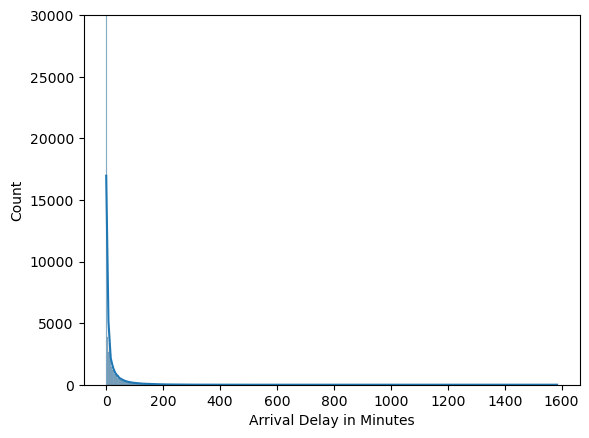

In [12]:
sns.histplot(data=data, x = data['Arrival Delay in Minutes'], kde =True)
plt.ylim(0,30000)
plt.show

## Gráficos de trotas ##
fig, ax = plt.sublots()

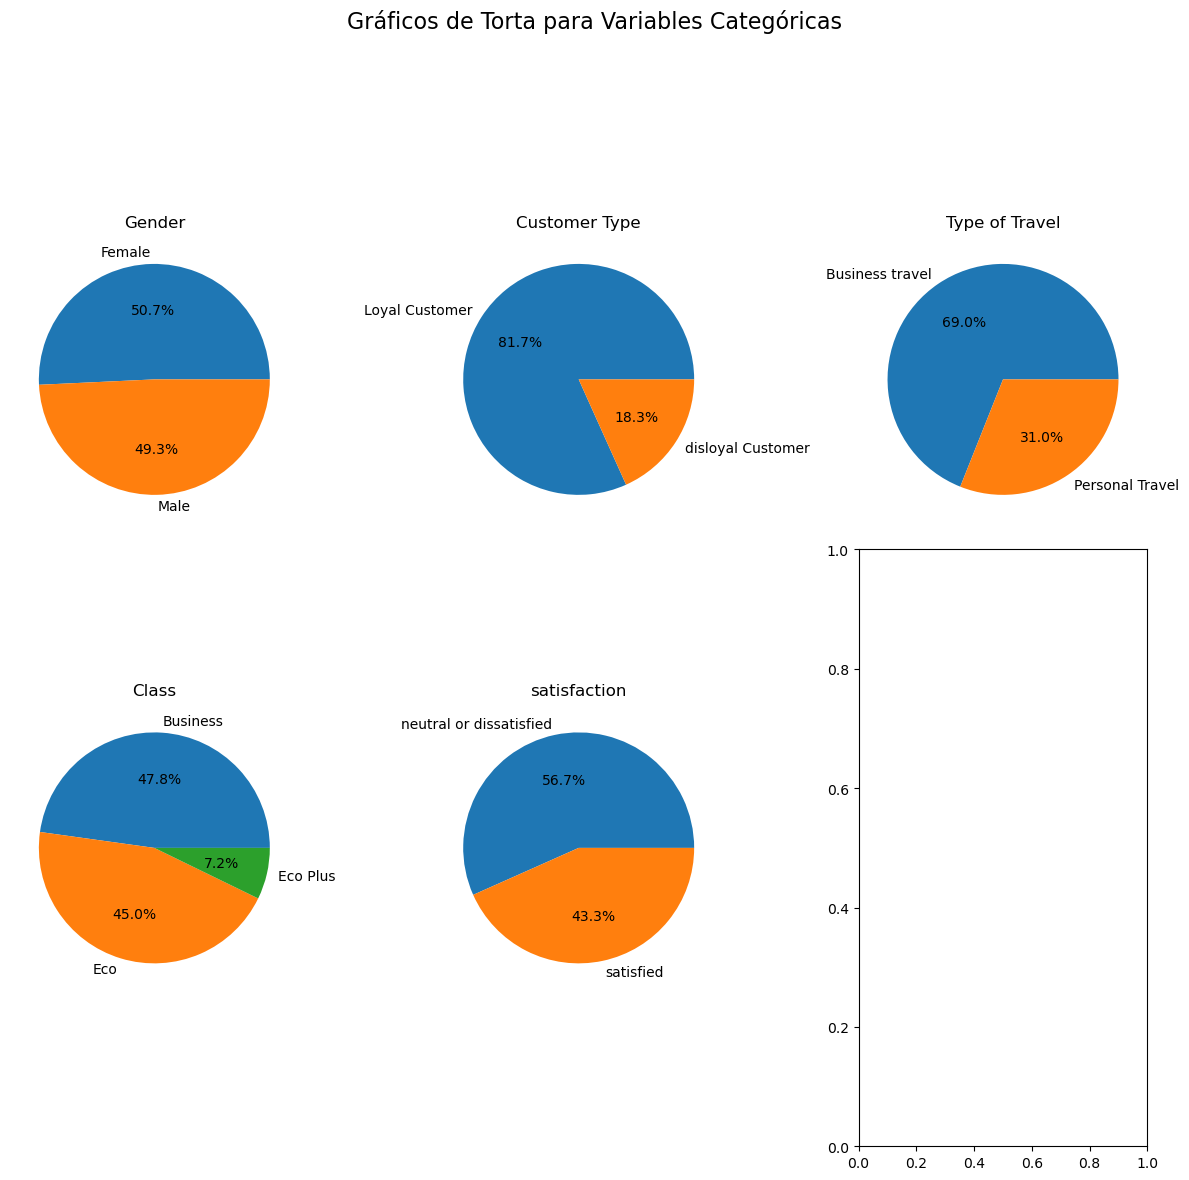

In [13]:
fig, ax = plt.subplots(2 , 3 , figsize=(12,12))
ax =ax.flat
cat_col = data.select_dtypes(include='object').columns # SOLO VAMOS A GRAFICAR VARIABLES CATEGÓRICAS
for i, col in enumerate(cat_col):
 ax[i].pie(x = data[col].value_counts(),
          labels = data[col].value_counts().index,
          autopct = '%.1f%%')
 ax[i].set_title(col)
 fig.tight_layout()
 fig.subplots_adjust(top=0.92)
 fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

Para que una vairable dea desbalanceada uno de sus valores debe ser mayor a l 80%, customer type debe ser ignorada,

### Variables a ignorar = Id, CustomerType ###


## Facotor de correlación ##
Determina si el comportamineto de una variable depende linealmente de otra variable
(ro) e -1 < ro > 1 la correalción no es causalidad, la causalidad nos llevaría que si algo sucede en todo caso pasará otra 
queremos indetificar la correlación ya que la variable colineales son nocivos para el modelo, se va a volver poco eficiente.

Direción = la correlación tiene dos tendecias, si ro es positiva la correlación es directa si ro es negativo la correlación va a se negativa. 

- -0.25  < ro > 0.25 nula
- +/- (0.5  < ro > 0.25)  debíl 
- +/- (0.75  < ro > 0.5)  moderada
- +/- (1  < ro > 0.75) fuerte

correlación fuerte en x y no en y ignoro variables 
correlación fuerte en x y en y no ignoro 

solo es apta para variables númericas 









<function matplotlib.pyplot.show(close=None, block=None)>

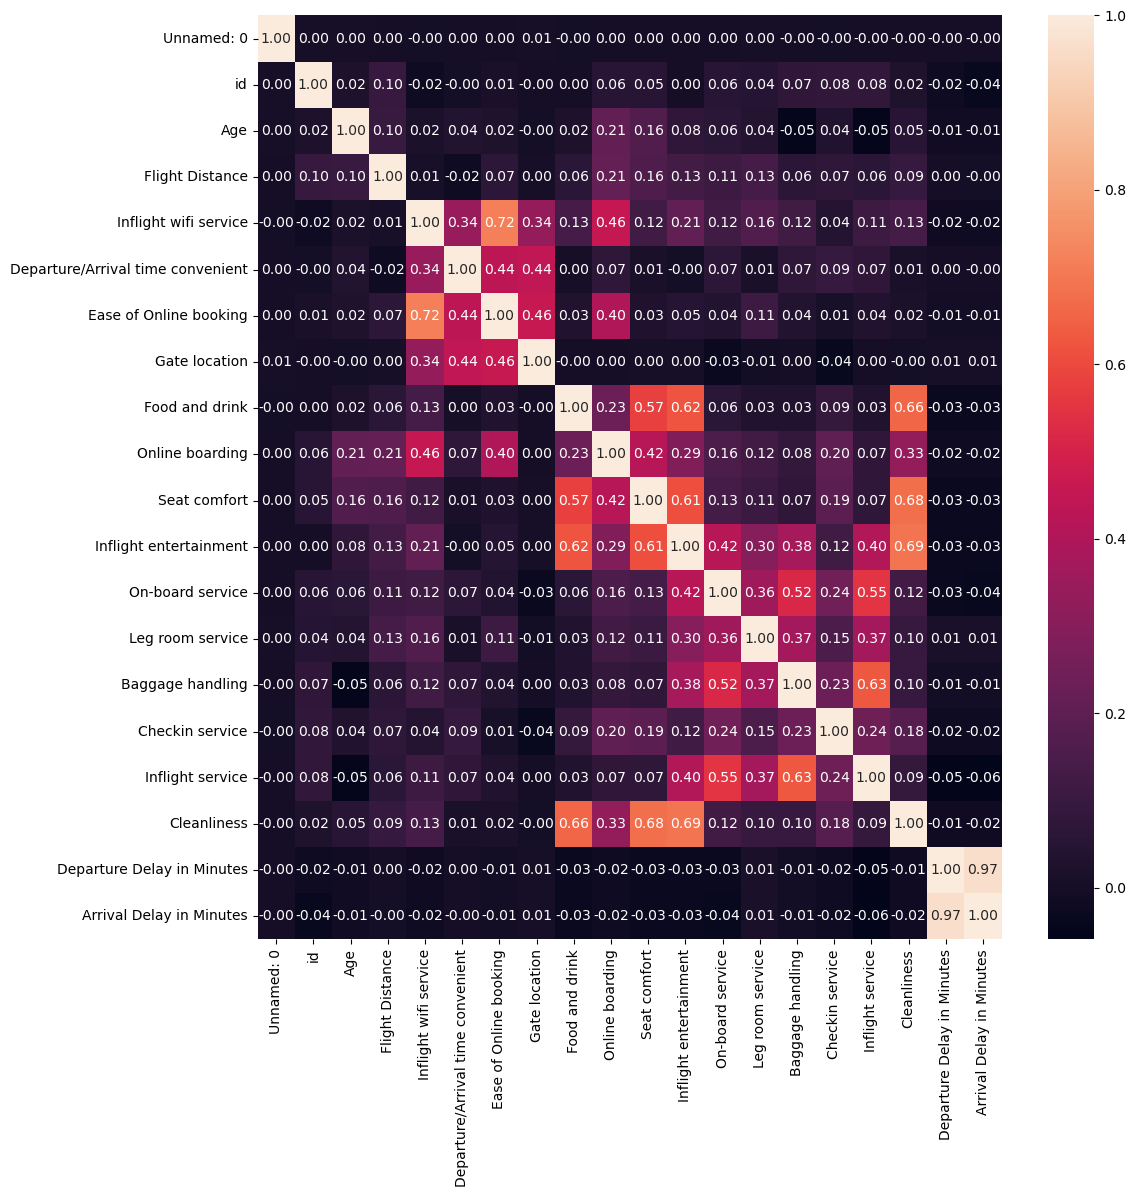

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(data = data.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show

1. Encontramos correlación entre Arrival delay y Departure delay ro = 0.97 > 0.75
2. Para decidir con cual nos quedamos eliminamos la que tenga mayor valor de correlación con las otras variables, en este caso eliminamos arrival delay ya que tiene más correlación con las otras variables que Departure delay 


# 6. Preparación de los datos #

- Activamos las decisiones de ignarar variavles 
- Transformación de variables para que sean "entendibles"

In [15]:
# Eliminamos la variables #
data_mod = data.drop(['Unnamed: 0','id', 'Customer Type' , 'Arrival Delay in Minutes'], axis = 1 )
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  object
 1   Age                                103904 non-null  int64 
 2   Type of Travel                     103904 non-null  object
 3   Class                              103904 non-null  object
 4   Flight Distance                    103904 non-null  int64 
 5   Inflight wifi service              103904 non-null  int64 
 6   Departure/Arrival time convenient  103904 non-null  int64 
 7   Ease of Online booking             103904 non-null  int64 
 8   Gate location                      103904 non-null  int64 
 9   Food and drink                     103904 non-null  int64 
 10  Online boarding                    103904 non-null  int64 
 11  Seat comfort                       103904 non-null  

##### Transformación 

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler #Onehot ya que no son normales 
from sklearn.pipeline import Pipeline

In [17]:
num_col =  data_mod.select_dtypes(include= [ 'int64' , 'float64']).columns.to_list()
cat_col = data_mod.select_dtypes(include= [ 'object']).columns.to_list()
numtrans = Pipeline(steps= [('caler', MinMaxScaler())])
cattrans = Pipeline(steps= [('encoder', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[('num', numtrans, num_col),
                                               ('cat', cattrans, cat_col)]
                                 , remainder='passthrough')

preprocessor
                    

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('caler', MinMaxScaler())]),
                                 ['Age', 'Flight Distance',
                                  'Inflight wifi service',
                                  'Departure/Arrival time convenient',
                                  'Ease of Online booking', 'Gate location',
                                  'Food and drink', 'Online boarding',
                                  'Seat comfort', 'Inflight entertainment',
                                  'On-board service', 'Leg room service',
                                  'Baggage handling', 'Checkin service',
                                  'Inflight service', 'Cleanliness',
                                  'Departure Delay in Minutes']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'Type of Travel', 'Class',
                                  'satisfaction'])])

In [18]:
data_pre = preprocessor.fit_transform(data_mod)
data_pre

array([[0.07692308, 0.08663166, 0.6       , ..., 1.        , 1.        ,
        0.        ],
       [0.23076923, 0.04119548, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.24358974, 0.2243538 , 0.4       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.29487179, 0.39660743, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.19230769, 0.19567851, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.25641026, 0.34168013, 0.2       , ..., 0.        , 1.        ,
        0.        ]], shape=(103904, 26))

In [19]:
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([cod_cat, num_col])
data_pro = pd.DataFrame(data_pre, columns=labels)
data_pro.head()

,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Age,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.015704,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.000628,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.006910,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


Etapa de ajuste, en esta etapa vamos a usar diferentes tipos de mecanismos de agrupamiento, en la toría hay 10 tipos de modelos de agrupamiento, vamos a usar 4 en este curso:

Familias de los modelos

- Partition: Exigen a priori indicar la cantidad de particiones, crean grupos esfericos, la interpretación se basa en el centro de la esfera, entonces el appelido del metodo determina cual es el centro de la esfera 
  - Kmeans
  - Kmedians
  - Kmediods
  - kmodes
  - fuzzyMeans (los individuos pueden tener pertenecia a varios grupos en ciertas probabilidades)

- Jerarquicos: Se basan en la importancia de asociar individuos que estén cerca, le dan mucha importancia al "nivel de asociación, tiene mayor relevancia la cercanía que la lejanía"
  - Aglomerativo: junta de dos en dos hasta que todos sean un grupo
  - Divisivo: los divide hasta que sean uno

- Densidad: Identifican espacios de alta cantidad de individuos
  - DBScan
  - GMM

EN CLASE: K-means, Aglomerative, DBdcann

DEFINICIONES

Híperparametro: un parametro del modelo que afecta su estructura matemática por lo tanto su comportamiento 
Distancia: Valor númerico calculado como la diferencia de individuos en el espacio 
  - Euclidiana: diferencia vectorial ^2 (p-q)^2 se usa mas por ser diferenciable, más facíl calcular la derivada,
  la derivada en el vertice de la aprabola existe en la absoluta no 
  - Manhatan: abs(p-q)
  - Cos: (abs(p) - abs(q)) / ||p|| x ||q||  LENGUAJE NATURAL

El proceso de optimización de los modelos minimiza la distancia existente entre los individuos de un mismo grupo y maximiza la distancia con los individuos de otros grupos.

  Luego del ajuste sigue la etapa de validación, en este momento decidimos cual modelo se ajusta mejor a mis datos y a mi modelo de negocio 